### <center>Nabila Azkiya Rosyida Wijayanti</center>
#### <center>F1D022149</center>

# Memperbaiki kualitas citra

Menggunakan :
- Kernel 3x3 berisi 1/9 dengan metode Mean, Median dan Modus
- Kernel 9x9 dengan berisi 1/81 dengan metode yang sama seperti poin sebelumnya
- kernel 3x3 untuk melakukan sharpening dan smoothing

In [165]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

3 line diatas merupakan 3 baris code phyton yang mengimport 3 library, yaitu :
- `CV2` merupakan library untuk memproses gambar dan video, yang biasanya digunakan untuk membaca, menulis, dan memanipulasi citra. 
- `Numpy` merupakan library untuk komputasi numerik dalam phyton, digunakan untuk mengolah data array dan matriks dengan cepat dan efisien. 
- `matlotlib.pyplot` merupakan library untuk visualisasi data dalam bentuk grafik, seperti plot, histogram, dan diagram

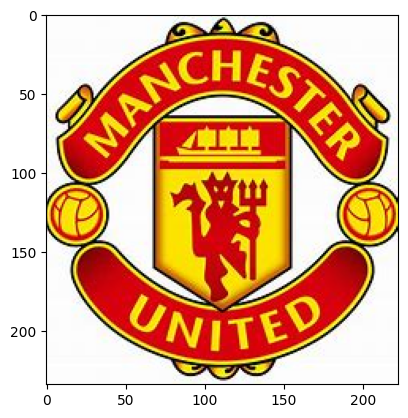

In [166]:
Img = plt.imread ("../assets/manchester_united.jpeg")
plt.imshow (Img)

Script di atas digunakan untuk membaca dan menampilkan gambar `"manchester_united.jpeg"` menggunakan library matplotlib `(plt)` . `plt.imread("../assets/manchester_united.jpeg")` digunakan untuk membaca gambar dari file yang disimpan pada folder `"assets"` dengan nama file `"manchester_united.jpeg"` dan disimpan dalam variabel `"img"` sebagai array `NumPy`. Selanjutnya, `"plt.imshow(img)"` digunakan untuk menampilkan gambar yang telah dibaca sebagai representasi visual dari array gambar tersebut.

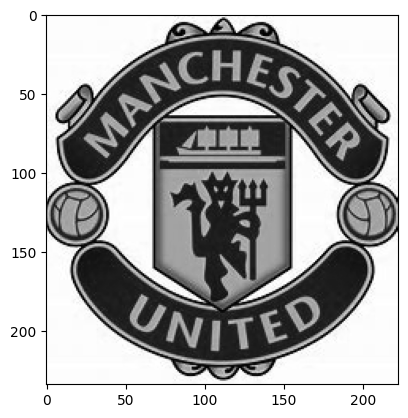

In [167]:
grayImg = cv.cvtColor(Img, cv.COLOR_BGR2GRAY)
plt.imshow(grayImg, cmap="gray")

Script diatas digunakan untuk mengubah citra berwarna `RGB` menjadi citra grayscale. `cvtColor()` merupakan fungsi dari library `cv2` yang digunakan untuk mengubah format warna citra. Dalam code tersebut, citra `"Img"` diubah menjadi citra grayscale menggunakan mode warna `BGR2GRAY`. Setelah citra diubah, citra grayscale disimpan dalam variabel `"grayImg"` dan ditampilkan menggunakan `plt.imshow`. Script plt.imshow `(Img, cmap='gray')` digunakan untuk menampilkan gambar grayscale dengan menggunakan fungsi `imshow()` dari library `matplotlib.pyplot`. `cmap="gray"` digunakan untuk menentukan colormap yang akan digunakan saat menampilkan citra, yaitu colormap skala abu-abu `"gray"`.

# Memperbaiki kualitas citra dari gambar 

- Kernel 3x3 berisi 1/9 dengan metode Mean, Median dan Modus
- Kernel 9x9 dengan berisi 1/81 dengan metode yang sama seperti poin sebelumnya
- kernel 3x3 untuk melakukan sharpening dan smoothing

In [168]:
# Fungsi untuk mencari mean dari sebuah array
def find_mean(arr):
    return np.mean(arr)

# Fungsi menerapkan filter mean pada citra
def mean_filter(image, kernel_size):
    # Inisialisasi array result dengan ukuran yang sama dengan citra input dan untuk menyimpan citra hasil setelah diterapkan filter mean.
    result = np.zeros(image.shape, dtype=np.uint8) 
    # Iterasi untuk setiap piksel dalam citra input
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Mendapatkan region sekitar piksel saat ini berdasarkan ukuran kernel
            filter_region = image[max(0, i - kernel_size//2):min(image.shape[0], i + kernel_size//2 + 1),
                                  max(0, j - kernel_size//2):min(image.shape[1], j + kernel_size//2 + 1)]
            # Menghitung rata-rata dari region yang dipilih
            result[i, j] = find_mean(filter_region.flatten())
    # Mengembalikan citra hasil filter mean
    return result

Pada script diatas terdapat fungsi `find_mean` yang digunakan unntuk mencari nilai rata-rata dari sebuah array `arr`, dengan menggunakan library `NumPy` `np.mean(arr)`.  
Dan pada script diatas juga terdapat fungsi `mean_filter` yang digunnakan untuk menerapkan filter mean (rata-rata) pada  citra (gambar).

In [169]:
# Fungsi untuk mencari median dari sebuah array
def find_median(arr):
    # Mengurutkan array secara ascending
    sorted_arr = np.sort(arr)
    # Menghitung panjang array
    n = len(sorted_arr)
    # Jika panjang array ganjil, ambil nilai median
    if n % 2 == 1:
        median_value = sorted_arr[n // 2]
    # Jika panjang array genap, ambil rata-rata dari dua nilai tengah    
    else:
        median_value = (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2
    # Mengembalikan nilai median
    return median_value

# Fungsi menerapkan filter median pada citra
def median_filter(image, kernel_size):
    # Inisialisasi array result dengan ukuran yang sama dengan citra input
    result = np.zeros(image.shape, dtype=np.uint8)
    # Iterasi untuk setiap piksel dalam citra input
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
             # Mendapatkan region sekitar piksel saat ini berdasarkan ukuran kernel
            filter_region = image[max(0, i - kernel_size//2):min(image.shape[0], i + kernel_size//2 + 1),
                                  max(0, j - kernel_size//2):min(image.shape[1], j + kernel_size//2 + 1)]
            # Menggunakan fungsi find_median untuk menghitung nilai median dari region yang dipilih
            result[i, j] = find_median(filter_region.flatten())
    # Mengembalikan citra hasil filter median
    return result

Pada script diatas terdapat fungsi `find_median` yang digunakan unntuk mencari nilai median (nilai tengah) dari sebuah array `arr`, dengan menggunakan library `NumPy` `np.mean(arr)`.  
Dan pada script diatas juga terdapat fungsi `median_filter` yang digunnakan untuk menerapkan filter median pada  citra (gambar).

In [170]:
# Fungsi mencari modus dari sebuah array
def find_modus(arr):
    # Membuat dictionary untuk menghitung frekuensi kemunculan setiap pixel
    count = {}
    for pixel in arr:
        if pixel in count:
            count[pixel] += 1
        else:
            count[pixel] = 1
    # Inisialisasi variabel untuk nilai modus dan frekuensinya
    max_count = 0
    most_frequent_value = None
    # Iterasi melalui setiap item dalam dictionary count
    for value, frequency in count.items():
        # Memeriksa apakah frekuensi saat ini lebih besar dari frekuensi maksimum yang sudah ditemukan
        if frequency > max_count:
            # Jika iya, update nilai frekuensi maksimum dan nilai modus
            max_count = frequency
            most_frequent_value = value
    # Mengembalikan nilai modus (nilai yang paling sering muncul)
    return most_frequent_value

# Fungsi menerapkan filter modus pada citra
def modus_filter(image, lebarFilter, tinggiFilter):
    # Membuat array result dengan ukuran yang sama dengan citra input
    result = np.zeros(image.shape, dtype=np.uint8)
    # Iterasi melalui setiap piksel dalam citra input
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Mendapatkan region sekitar piksel saat ini berdasarkan ukuran filter
            filter_region = image[max(0, i - tinggiFilter//2):min(image.shape[0], i + tinggiFilter//2 + 1),
                                  max(0, j - lebarFilter//2):min(image.shape[1], j + lebarFilter//2 + 1)]
            # Menggunakan fungsi find_modus untuk menghitung nilai modus dari region yang dipilih
            result[i, j] = find_modus(filter_region.flatten())
    # Mengembalikan citra hasil filter modus
    return result

Pada script diatas terdapat fungsi `find_modus` yang digunakan unntuk mencari nilai modus (nilai yang muncul paling sering).  
Dan pada script diatas juga terdapat fungsi `modus_filter` yang digunnakan untuk menerapkan filter modus pada  citra (gambar).

In [171]:
# Fungsi menerapkan filter berdasarkan metode (mean, median, modus)
def apply_filter(image, kernel_size, method):
    # Memilih filter berdasarkan metode yang dipilih
    if method == 'mean':
        # Memanggil fungsi mean_filter untuk menerapkan filter mean pada citra
        filtered_image = mean_filter(image, kernel_size)
    elif method == 'median':
        # Memanggil fungsi median_filter untuk menerapkan filter median pada citra
        filtered_image = median_filter(image, kernel_size)
    elif method == 'modus':
        # Memanggil fungsi modus_filter untuk menerapkan filter modus pada citra
        filtered_image = modus_filter(image, kernel_size, kernel_size)  # Perbaikan disini
    else:
        # Jika metode yang dipilih tidak valid, raise ValueError
        raise ValueError("Metode filter tidak valid")
    # Mengembalikan citra hasil setelah diterapkan filter
    return filtered_image

Pada script diatas terdapat fungsi `apply_filter` yang digunakan untuk menerapkan berbagai jenis filter (mean, median, atau modus) pada citra

In [172]:
# Filter dengan Kernel 3x3 (Mean, Median, Modus)
kernel_size_3x3 = 3
img_mean_3x3 = apply_filter(grayImg, kernel_size_3x3, 'mean')
img_median_3x3 = apply_filter(grayImg, kernel_size_3x3, 'median')
img_mode_3x3 = apply_filter(grayImg, kernel_size_3x3, 'modus')

# Filter dengan Kernel 9x9 (Mean, Median, Modus)
kernel_size_9x9 = 9
img_mean_9x9 = apply_filter(grayImg, kernel_size_9x9, 'mean')
img_median_9x9 = apply_filter(grayImg, kernel_size_9x9, 'median')
img_mode_9x9 = apply_filter(grayImg, kernel_size_9x9, 'modus')

# Kernel untuk sharpening dan smoothing
kernel_sharpen = np.ones((3, 3), np.float32) / 9
kernel_smooth = np.ones((3, 3), np.float32) / 10

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2308\2917695612.py:12: RuntimeWarning: overflow encountered in scalar add
  median_value = (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2


Pada script digunakan untuk menerapkan berbagai jenis filter (mean, median, modus) pada citra dengan menggunakan kernel berbeda (3x3 dan 9x9) serta menerapkan proses sharpening dan smoothing pada citra.

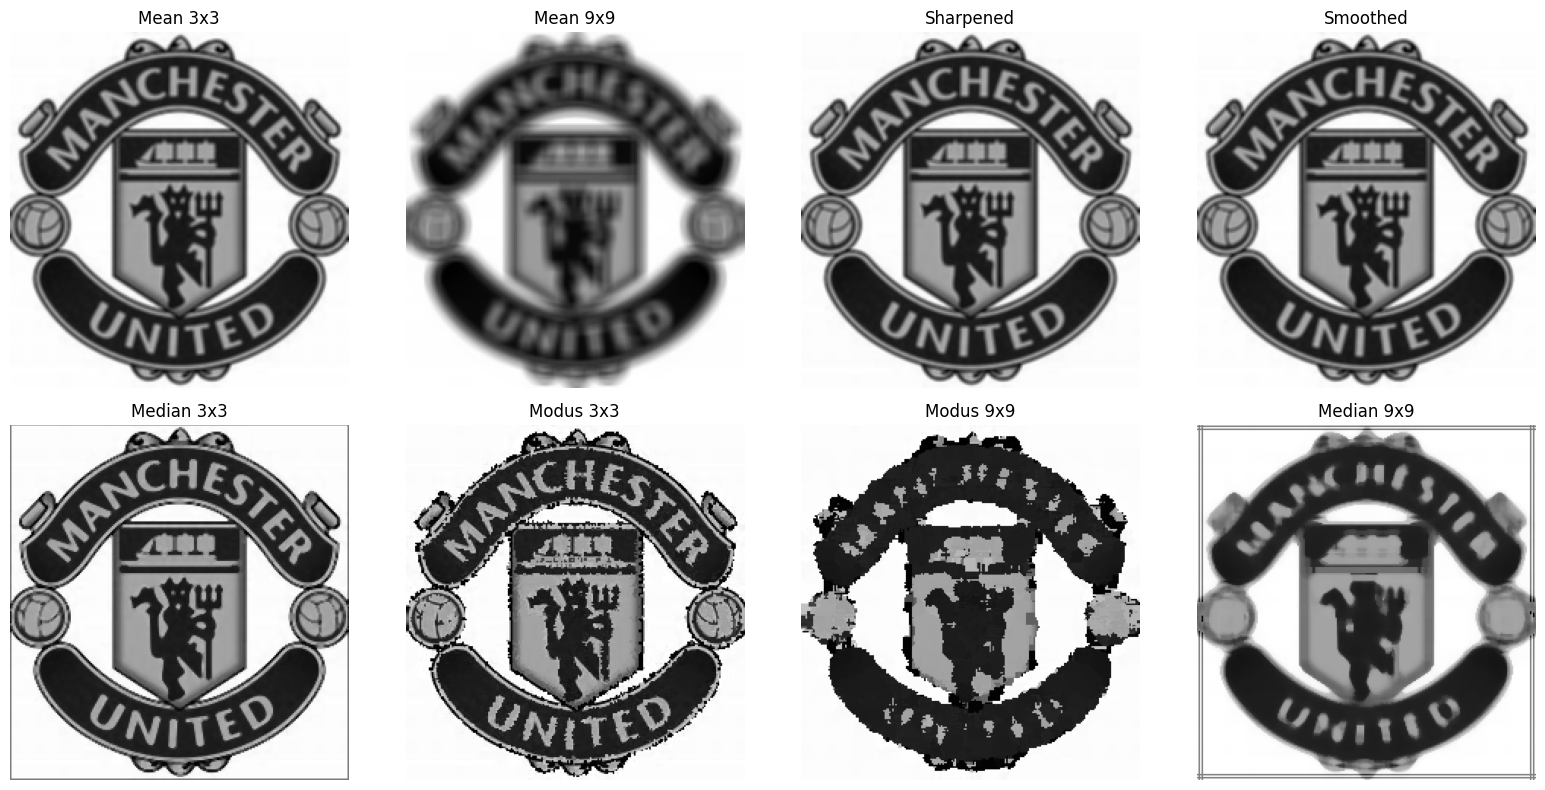

In [173]:
# Filter Sharpening
img_sharpened = cv.filter2D(grayImg, -1, kernel_sharpen)

# Filter Smoothing
img_smoothed = cv.filter2D(grayImg, -1, kernel_smooth)

# menampilkan hasil dengan ukuran figur (figure size) sebesar 16 inci (panjang) dan 8 inci (tinggi). 
plt.figure(figsize=(16, 8))

plt.subplot(241), 
plt.imshow(img_mean_3x3, cmap="gray")
plt.title('Mean 3x3')
plt.axis('off')

plt.subplot(245), 
plt.imshow(img_median_3x3, cmap="gray")
plt.title('Median 3x3')
plt.axis('off')

plt.subplot(246), 
plt.imshow(img_mode_3x3, cmap="gray"), 
plt.title('Modus 3x3')
plt.axis('off')

plt.subplot(242), 
plt.imshow(img_mean_9x9, cmap="gray"), 
plt.title('Mean 9x9')
plt.axis('off')

plt.subplot(248), 
plt.imshow(img_median_9x9, cmap="gray"), 
plt.title('Median 9x9')
plt.axis('off')

plt.subplot(247), 
plt.imshow(img_mode_9x9, cmap="gray"), 
plt.title('Modus 9x9')
plt.axis('off')

plt.subplot(243), 
plt.imshow(img_sharpened, cmap="gray"), 
plt.title('Sharpened')
plt.axis('off')

plt.subplot(244), 
plt.imshow(img_smoothed, cmap="gray"), 
plt.title('Smoothed')
plt.axis('off')

plt.tight_layout()
plt.show()

Script diatas digunakan untuk membuat tampilan grid (kisi) dengan berbagai hasil filter yang telah diaplikasikan pada citra. Gambar plot dibuat dengan ukuran 16x8 inci, kemudian berbagai citra hasil filter ditempatkan di dalamnya dalam bentuk grid 2 baris dan 4 kolom. Setelah itu, tata letak (layout) subplot diatur agar rapi menggunakan plt.tight_layout(), dan akhirnya gambar plot ditampilkan dengan plt.show().

# Deteksi tepi untuk semua jenis perbaikan

Note : 
- Dengan operator Sobel, Prewitt dan Robert 
- Pada gambar ./assets/manchester_united.jpeg

In [174]:
# Mendefinisikan fungsi getPad untuk menambahkan padding ke citra
def getPad(image, kernel):
    # Membuat array pad dengan ukuran yang lebih besar dari citra input untuk menampung padding
    pad = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    # Menempatkan citra input ke dalam area tengah array pad
    pad[1:-1, 1:-1] = image
    # Mengembalikan array pad yang sudah ditambahkan padding
    return pad

Pada script diatas terdapat fungsi `getPad` yang digunakan untuk menambahkan padding ke citra sebelum melakukan operasi konvolusi, dan memastikan bahwa citra tidak kehilangan informasi di pinggir citra (tepi).

In [175]:
# Mendefinisikan fungsi findEdge untuk deteksi tepi dengan kernel tertentu
def findEdge(image, kernelx, kernely):
    # Inisialisasi array result dengan ukuran yang sama dengan citra input
    result = np.zeros(image.shape)
    # Mendapatkan array pad dengan menambahkan padding ke citra input menggunakan fungsi getPad
    pad = getPad(image, kernelx)

    # Iterasi melalui setiap piksel dalam citra input
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            x = 0
            y = 0
            # Iterasi melalui setiap elemen dalam kernel
            for k in range(kernelx.shape[0]):
                for l in range(kernelx.shape[1]):
                    # Konvolusi citra dengan kernel horizontal (kernelx)
                    x += pad[i + k][j + l] * kernelx[k, l]
                    # Konvolusi citra dengan kernel vertikal (kernely)
                    y += pad[i + k][j + l] * kernely[k, l]
            # Menghitung magnitudo gradien menggunakan metode Euclidean
            result[i, j] = math.sqrt(x**2 + y**2)

    # Mengonversi hasil ke tipe data uint8 untuk koreksi nilai yang mungkin melebihi rentang 0-255
    return result.astype(np.uint8)

Pada script diatas terdapat fungsi `findEdge` yang digunakan untuk melakukan deteksi tepi pada citra dengan menggunakan kernel-kernel `kernelx` (untuk arah horizontal) dan `kernely` (untuk arah vertikal).

In [176]:
# Metode Sobel
# Sobel Horizontal
sobelX = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# Sobel Vertikal
sobelY = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

Script diatas digunakan untuk mendefinisikan kernel-kernel Sobel yang digunakan untuk deteksi tepi dalam pengolahan citra. Terdapat dua kernel yang digunakan: 
- Deteksi tepi secara horizontal (`sobelX`) 
- Deteksi tepi secara vertikal (`sobelY`)

In [177]:
# Citra Manchester United (MU)
img = cv.imread('../assets/manchester_united.jpeg', cv.IMREAD_GRAYSCALE)

# Filter dengan Kernel 3x3 (Mean, Median, Modus)
kernel3 = np.ones((3, 3)) / 9
mean3 = cv.filter2D(img, -1, kernel3)
median3 = cv.medianBlur(img, 3)
modus3 = cv.blur(img, (3, 3))

# Filter dengan Kernel 9x9 (Mean, Median, Modus)
kernel9 = np.ones((9, 9)) / 81
mean9 = cv.filter2D(img, -1, kernel9)
median9 = cv.medianBlur(img, 9)
modus9 = cv.blur(img, (9, 9))

# Filter Sharpening dan Smoothing
kernel_sharpen = np.array([[-1, -1, -1],
                           [-1, 9, -1],
                           [-1, -1, -1]]) / 9
sharp_MU = cv.filter2D(img, -1, kernel_sharpen)
smooth_MU = cv.GaussianBlur(img, (3, 3), 0.5)

Pada script diatas berisi teknik pengolahan citra menggunakan filter konvolusi dengan kernel berbeda (rata-rata, median, modus) serta operasi sharpening dan smoothing.

In [178]:
# Deteksi Tepi dengan metode Sobel
sobel_mean3 = findEdge(mean3, sobelX, sobelY)
sobel_median3 = findEdge(median3, sobelX, sobelY)
sobel_modus3 = findEdge(modus3, sobelX, sobelY)
sobel_mean9 = findEdge(mean9, sobelX, sobelY)
sobel_median9 = findEdge(median9, sobelX, sobelY)
sobel_modus9 = findEdge(modus9, sobelX, sobelY)
sobel_smooth = findEdge(smooth_MU, sobelX, sobelY)
sobel_sharp = findEdge(sharp_MU, sobelX, sobelY)

Script di atas digunakan untuk melakukan deteksi tepi pada citra dengan `metode Sobel` menggunakan kernel Sobel horizontal (`sobelX`) dan kernel Sobel vertikal (`sobelY`).

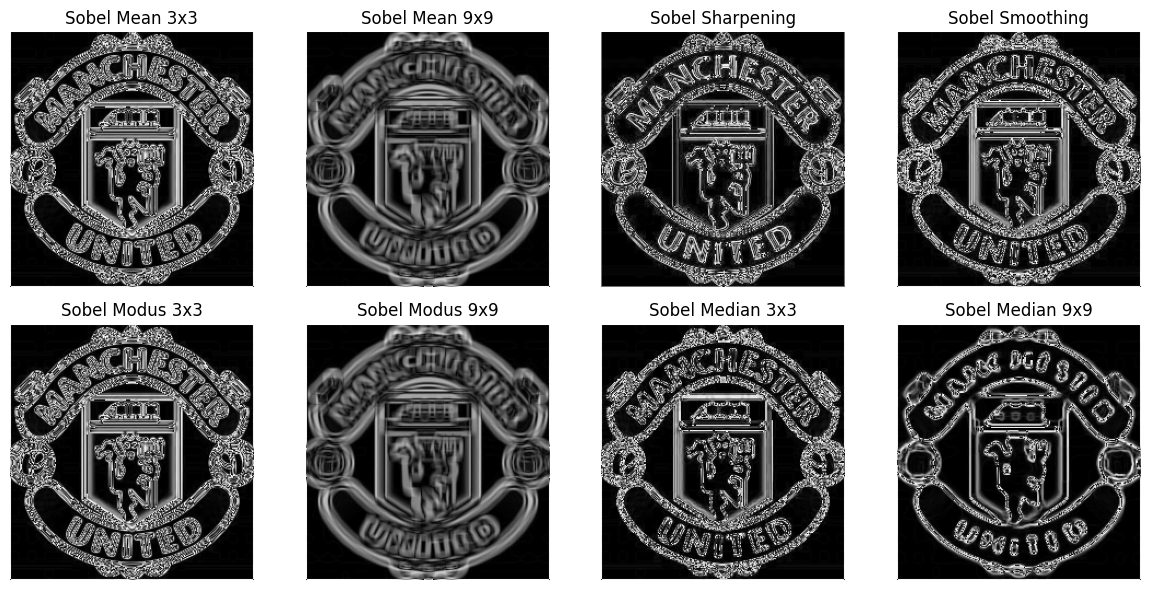

In [179]:
# Tampilkan hasil deteksi tepi dengan metode Sobel
plt.figure(figsize=(12, 6))

plt.subplot(2, 4, 1)
plt.imshow(sobel_mean3, cmap='gray')
plt.title("Sobel Mean 3x3")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(sobel_mean9, cmap='gray')
plt.title("Sobel Mean 9x9")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(sobel_sharp, cmap='gray')
plt.title("Sobel Sharpening")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(sobel_smooth, cmap='gray')
plt.title("Sobel Smoothing")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(sobel_modus3, cmap='gray')
plt.title("Sobel Modus 3x3")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(sobel_modus9, cmap='gray')
plt.title("Sobel Modus 9x9")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(sobel_median3, cmap='gray')
plt.title("Sobel Median 3x3")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(sobel_median9, cmap='gray')
plt.title("Sobel Median 9x9")
plt.axis('off')

plt.tight_layout()
plt.show()

Script di atas digunakan untuk menampilkan hasil deteksi tepi dengan metode Sobel menggunakan berbagai jenis filter dan ukuran kernel.

In [180]:
# Metode Prewitt
# Prewitt Horizontal
prewittX = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])
# Prewitt Vertikal
prewittY = np.array([[-1, -1, -1],
                     [0, 0, 0],
                     [1, 1, 1]])

Script diatas digunakan untuk mendefinisikan kernel-kernel Prewitt yang digunakan untuk deteksi tepi dalam pengolahan citra. Terdapat dua kernel yang digunakan: 
- Deteksi tepi secara horizontal (`prewittX`) 
- Deteksi tepi secara vertikal (`prewittY`)

In [181]:

# Filter dengan Kernel 3x3 (Mean, Median, Modus)
prewitt_mean3 = findEdge(mean3, prewittX, prewittY)
prewitt_median3 = findEdge(median3, prewittX, prewittY)
prewitt_modus3 = findEdge(modus3, prewittX, prewittY)
prewitt_mean9 = findEdge(mean9, prewittX, prewittY)
prewitt_median9 = findEdge(median9, prewittX, prewittY)
prewitt_modus9 = findEdge(modus9, prewittX, prewittY)
prewitt_smooth = findEdge(smooth_MU, prewittX, prewittY)
prewitt_sharp = findEdge(sharp_MU, prewittX, prewittY)

Script di atas digunakan untuk melakukan deteksi tepi pada citra dengan `metode Prewitt` menggunakan kernel Prewitt horizontal (`prewittX`) dan kernel prewitt vertikal (`prewittY`).

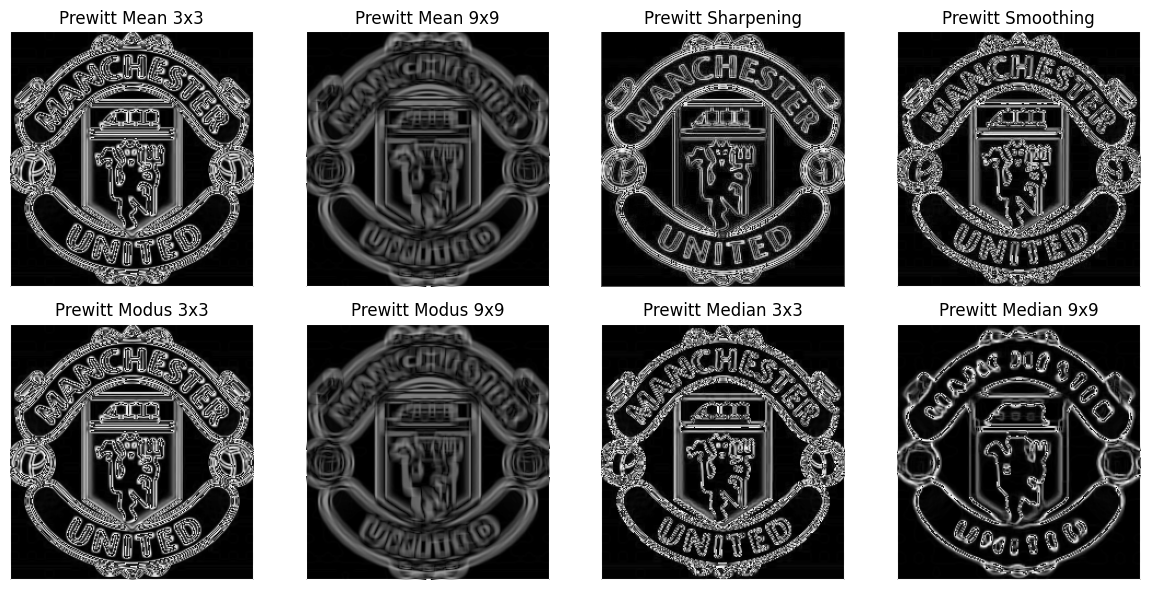

In [182]:
# Tampilkan hasil deteksi tepi dengan metode Prewitt
plt.figure(figsize=(12, 6))

plt.subplot(2, 4, 1)
plt.imshow(prewitt_mean3, cmap='gray')
plt.title("Prewitt Mean 3x3")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(prewitt_mean9, cmap='gray')
plt.title("Prewitt Mean 9x9")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(prewitt_sharp, cmap='gray')
plt.title("Prewitt Sharpening")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(prewitt_smooth, cmap='gray')
plt.title("Prewitt Smoothing")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(prewitt_modus3, cmap='gray')
plt.title("Prewitt Modus 3x3")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(prewitt_modus9, cmap='gray')
plt.title("Prewitt Modus 9x9")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(prewitt_median3, cmap='gray')
plt.title("Prewitt Median 3x3")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(prewitt_median9, cmap='gray')
plt.title("Prewitt Median 9x9")
plt.axis('off')

plt.tight_layout()
plt.show()


Script di atas digunakan untuk menampilkan hasil deteksi tepi dengan metode Prewitt menggunakan berbagai jenis filter dan ukuran kernel.

In [183]:
# Metode Roberts
robertsX = np.array([[1, 0],
                     [0, -1]])
robertsY = np.array([[0, 1],
                     [-1, 0]])

Script diatas digunakan untuk mendefinisikan kernel-kernel Prewitt yang digunakan untuk deteksi tepi dalam pengolahan citra. Terdapat dua kernel yang digunakan: 
- Deteksi tepi secara horizontal (`robertsX`) 
- Deteksi tepi secara vertikal (`robertsY`)

In [184]:
# Filter dengan Kernel 3x3 (Mean, Median, Modus)
roberts_mean3 = findEdge(mean3, robertsX, robertsY)
roberts_median3 = findEdge(median3, robertsX, robertsY)
roberts_modus3 = findEdge(modus3, robertsX, robertsY)
roberts_mean9 = findEdge(mean9, robertsX, robertsY)
roberts_median9 = findEdge(median9, robertsX, robertsY)
roberts_modus9 = findEdge(modus9, robertsX, robertsY)
roberts_smooth = findEdge(smooth_MU, robertsX, robertsY)
roberts_sharp = findEdge(sharp_MU, robertsX, robertsY)

Script di atas digunakan untuk melakukan deteksi tepi pada citra dengan `metode Roberts` menggunakan kernel Roberts horizontal (`robertsX`) dan kernel Roberts vertikal (`robertsY`).

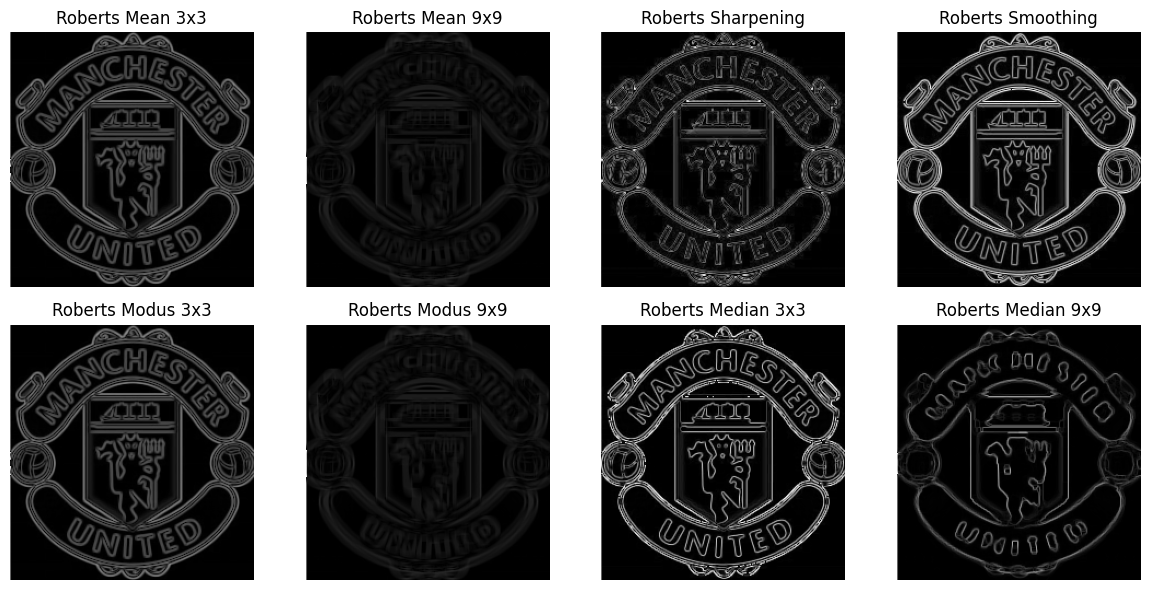

In [185]:
# Tampilkan hasil deteksi tepi dengan metode Roberts
plt.figure(figsize=(12, 6))

plt.subplot(2, 4, 1)
plt.imshow(roberts_mean3, cmap='gray')
plt.title("Roberts Mean 3x3")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(roberts_mean9, cmap='gray')
plt.title("Roberts Mean 9x9")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(roberts_sharp, cmap='gray')
plt.title("Roberts Sharpening")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(roberts_smooth, cmap='gray')
plt.title("Roberts Smoothing")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(roberts_modus3, cmap='gray')
plt.title("Roberts Modus 3x3")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(roberts_modus9, cmap='gray')
plt.title("Roberts Modus 9x9")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(roberts_median3, cmap='gray')
plt.title("Roberts Median 3x3")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(roberts_median9, cmap='gray')
plt.title("Roberts Median 9x9")
plt.axis('off')

plt.tight_layout()
plt.show()


Script di atas digunakan untuk menampilkan hasil deteksi tepi dengan metode Roberts menggunakan berbagai jenis filter dan ukuran kernel.